# Interface prototype

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\AC252489\AppData\Local\Temp\ipykernel_8692\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#
# Required packages to run the script
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticke
import seaborn as sns
from matplotlib.colors import LogNorm
import math
import os
import pickle as pkl
from scipy import sparse
from scipy.sparse.linalg import lsqr
import scipy.fftpack
import xlsxwriter
import importlib


In [3]:
import config

In [4]:
# 
# Importing functions 

from wavelet_decomposition import wavelet_decomposition_single_TS, reconstruct
from plots import plot_betas_heatmap
from utilities import import_excel
from plots import plot_EPN
from calc_EPN import calc_epn
from plots import fft
from import_excel import import_excel

## Step 0: Definning folders where data will be saved or were they will be imported.

In [5]:
# Import the configuration variables
import config

# Access the configuration variables
results_dir = config.RESULTS_DIR
trans_dir = config.TRANS_DIR
betas_dir = config.BETAS_DIR
matrix_dir = config.MATRIX_DIR

# Print the configuration variables to verify
print(f"Results directory: {results_dir}")
print(f"Translations directory: {trans_dir}")
print(f"Betas directory: {betas_dir}")
print(f"Matrix directory: {matrix_dir}")

Results directory: results
Translations directory: results\translation_calculation_results
Betas directory: results\beta_results
Matrix directory: results\saved_matrix\square_shape


## Step 1: Definning the control parameter of teh decomposition
#### in the Streamlit interface, those are input data

In [6]:
#
# Options of the wavelet decomposition
vy = 6  # vectors per yearsave
vw = 3  # vectors per week
vd = 6  # vectors per day
#
# Time scales of the wavelet decomposition
time_scales = [0.75, 1.5, 3., 6., 12, 24., 42., 84., 168., 273.75, 547.5, 1095., 2190., 4380.,
              8760.] # cycles length, in hours

# Importing excel time series

* Time series are imported from excel files. The should be formated like the example "input_time_series.xlsx".
     * Time Series are provided by trhe French TSO, RTE (https://www.rte-france.com/fr/eco2mix/eco2mix)
     * input_time_series.xlsx provides 7 years of French Wind power, Solar PV production and consumption
 
 <br />
 
* All years are renormalized to 1 MW so that They can be compared with one another
    * Signal is the renormalized by load_factor = 54 GW  for the French case
    
<br />

* For mathematical purposes signals need to have 64 data per day. The functioninport_excel() interpolate signals from dpd points to ndpd = 64
<br />

In [7]:
# Inporting time-series


# ------- Controle parameters -------

# Wich time series do you want to import from the excel file ?
time_series = ['Consumption', 'Wind', 'PV']
# for the signal interpolation
dpd = 48 # data per year
ndpd = 64 # new data per year (for the interpolation)
dpy = 365 # data per year :  cut the leap years to 365 years (annee bissexitle)
signal_length = ndpd * dpy

#
load_factor = 54e+3 # MW
#Mean value of electricity load

# Step 2: Perform wavelet decompositions using imported time series.

### This is the first objective of the interface: decomposition and analyses based on the 3 imported time series : wind Pv and load.

There is 7 years imported
['2012', '2013', '2014', '2015', '2016', '2017', '2018']


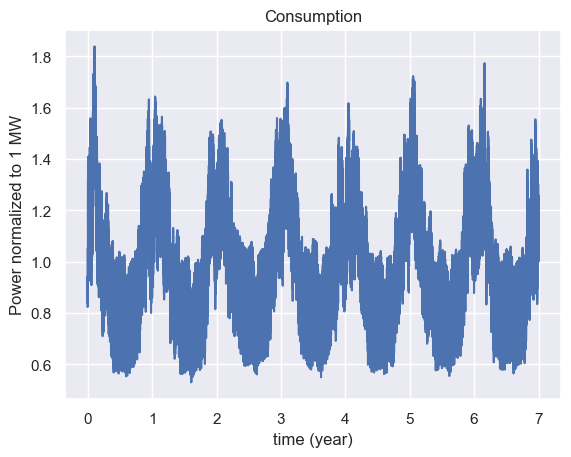

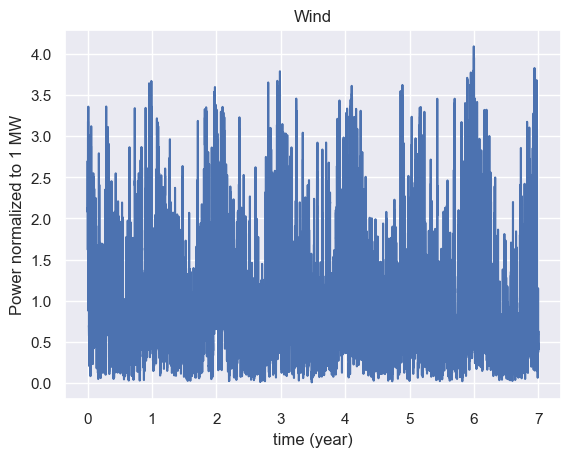

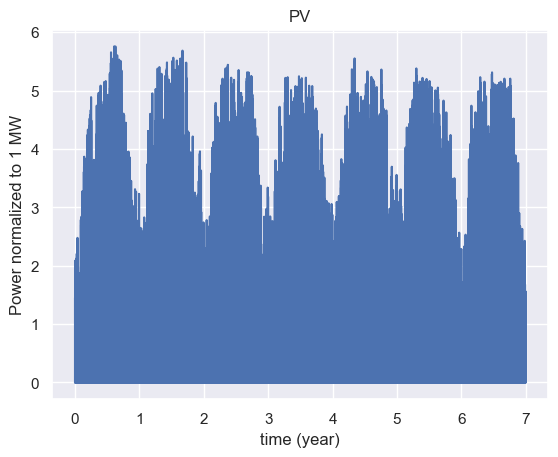

In [8]:
# ----------------------------------
# ------ Importing data ------------
# ----------------------------------

#
# Path
path_input_data = ""
input_file = 'input_time_series.xlsx'
#


stacked_input_data, years = import_excel(path_input_data, input_file, 
                                    dpd ,ndpd, dpy, time_series, 
                                    interp=True) # interpolate data from dpd to ndpd numper of points per day



In [9]:
# Diverse control files

time_scales = [0.75, 1.5, 3., 6., 12, 24., 42., 84., 168., 273.75, 547.5, 1095., 2190., 4380.,
        8760.] # cycles length, in hours
vy = 6  # number of vectors per years (child wavelets)
vw = 3  # vectors per week
vd = 6  # vectors per day


Load_ts = stacked_input_data['Consumption']
PV_ts = stacked_input_data['PV']
Wind_ts = stacked_input_data['Wind']



In [10]:
# Extract only one year (e.g., 2012) from your multi-year dataset
years_available = years
year_to_process = '2012'  # Change this to the year you want

# Calculate the indices for the selected year
year_index = years_available.index(year_to_process)
points_per_year = ndpd * dpy  # 64 * 365 = 23360 points per year
start_idx = year_index * points_per_year
end_idx = (year_index + 1) * points_per_year

# Extract only the selected year's data
TS_single_year = PV_ts[start_idx:end_idx]


# Now run decomposition on just this one year
trans_file, matrix_files, results_betas = wavelet_decomposition_single_TS(
    TS_single_year,  # ← Only one year of data
    year=year_to_process,  # ← Use the actual year (e.g., '2012')
    multi_year=None,  # ← Keep as None since we have only one year
    country_name='France',
    signal_type='PV',
    wl_shape='square',
    recompute_translation=False,
    imp_matrix=True,
    dpd=24,
    ndpd=64)



WAVELET DECOMPOSITION - PV - France
Years to process:   ['2012']
Data length:        23360 points
Expected per year:  23360 points
Wavelet Shape:      square
Recompute Trans:    False
Import Matrix:      True
Parameters:         vy=6, vw=3, vd=6

Creating directories...
✅ Directories ready

Paths from FileManager:
  Translation dir: results\France\square\translations
  Matrix dir:      results\France\square\matrices
  Beta dir:        results\France\square\betas
  Trans files:     ['trans_France_PV_2012.pkl']
  Matrix files:    ['A_2012.npz']

Processing translations...
  Loading: trans_France_PV_2012.pkl
✅ Translations ready for 1 years

Computing wavelet decomposition...
Importing matrix A square
Square sparsee matrix on year 2012 has been imported

✅ Decomposition complete
   Years processed: ['2012']
   ✅ Year 2012: 16 time scales (expected 16)

Saving beta coefficients...
   ✅ Saved: betas_France_PV_2012.pkl

✅ DECOMPOSITION COMPLETE
Translation files:
  ✅ results\France\square\t

Looking for matrix: results\France\square\matrices\A_2012.npz
✅ Loading matrix from: results\France\square\matrices\A_2012.npz
✅ Matrix loaded: shape (23360, 23423)
Reconstructing 15 time scales (out of 15 total available)...
✅ Reconstruction complete


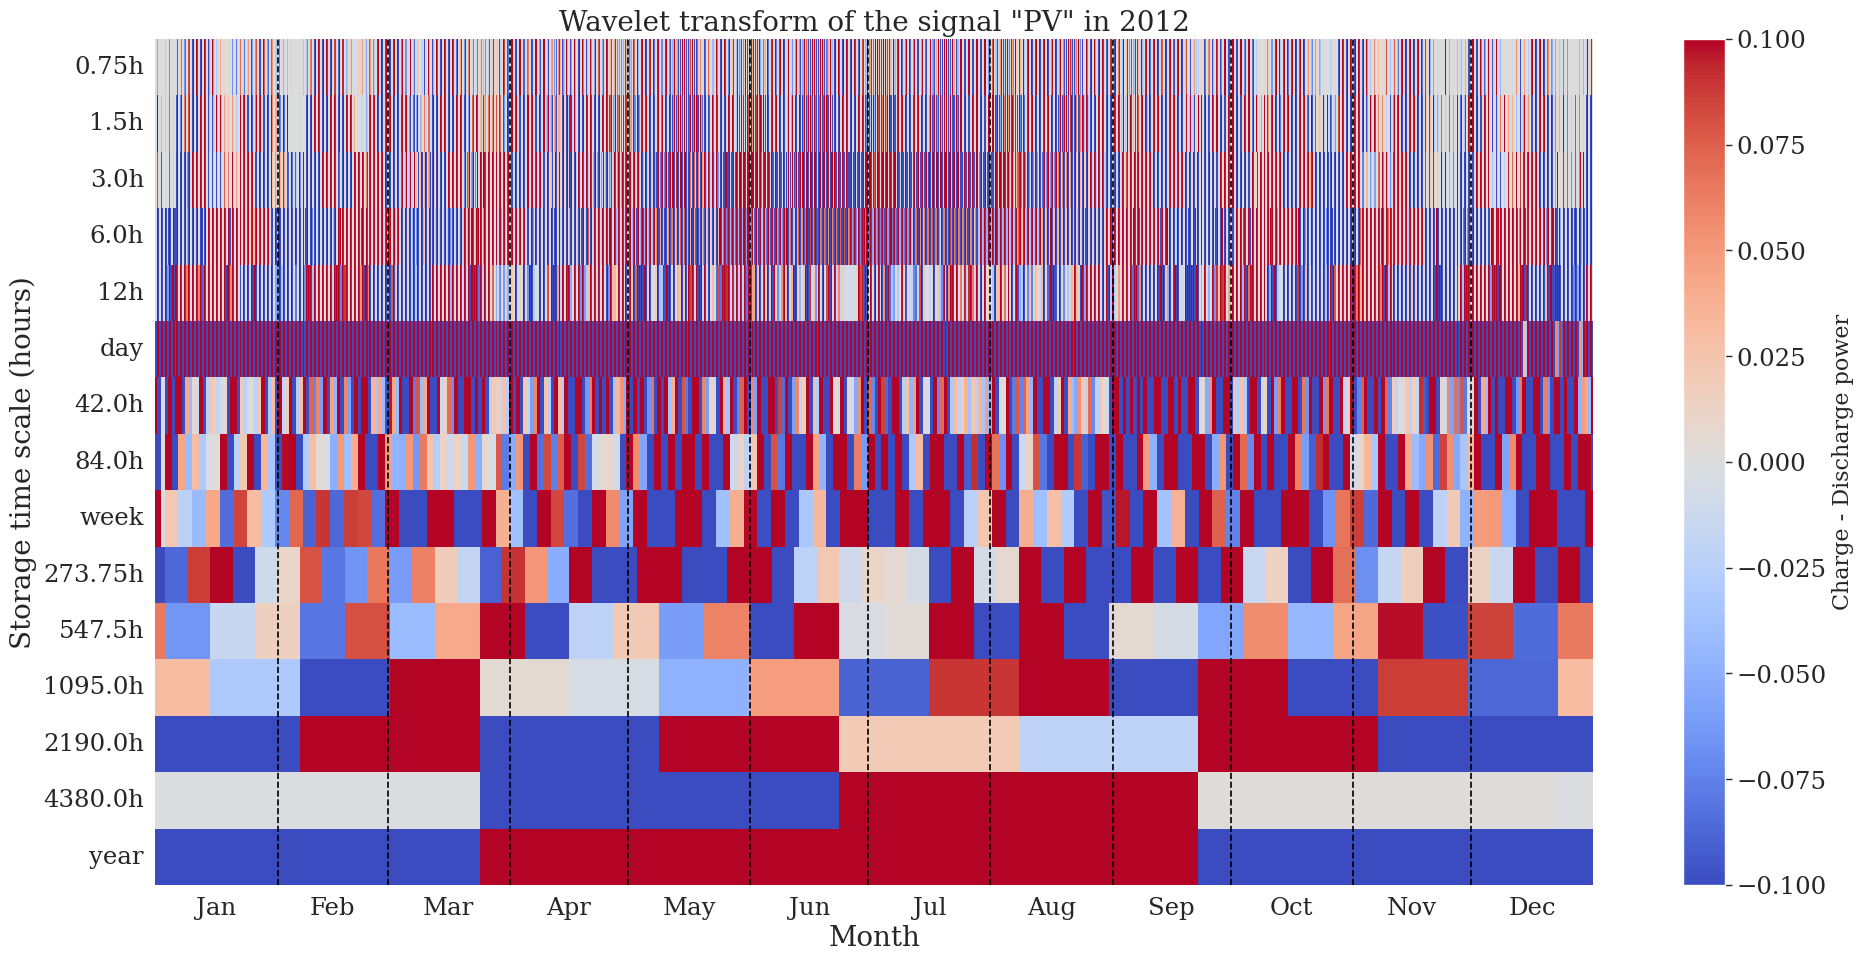

✅ Heatmap displayed for PV - 2012


In [26]:
plot_betas_heatmap(
    results_betas=results_betas,
    country_name='France',
    signal_type='PV',
    vy=6,
    vw=3,
    vd=6,
    ndpd=64,
    dpy=365,
    year='2012',
    years=['2012'],
    time_scales=time_scales,
    reconstructed_time_scales=time_scales,
    cmin=-0.1,
    cmax=0.1,
    ccenter=None,
    wl_shape='square'  # ← NEW: must match decomposition wl_shape
)

c:\Users\AC252489\Documents\GitHub\wavelet_decomposition\wavelet_decomposition\plots.py:335: RuntimeWarning:

divide by zero encountered in divide



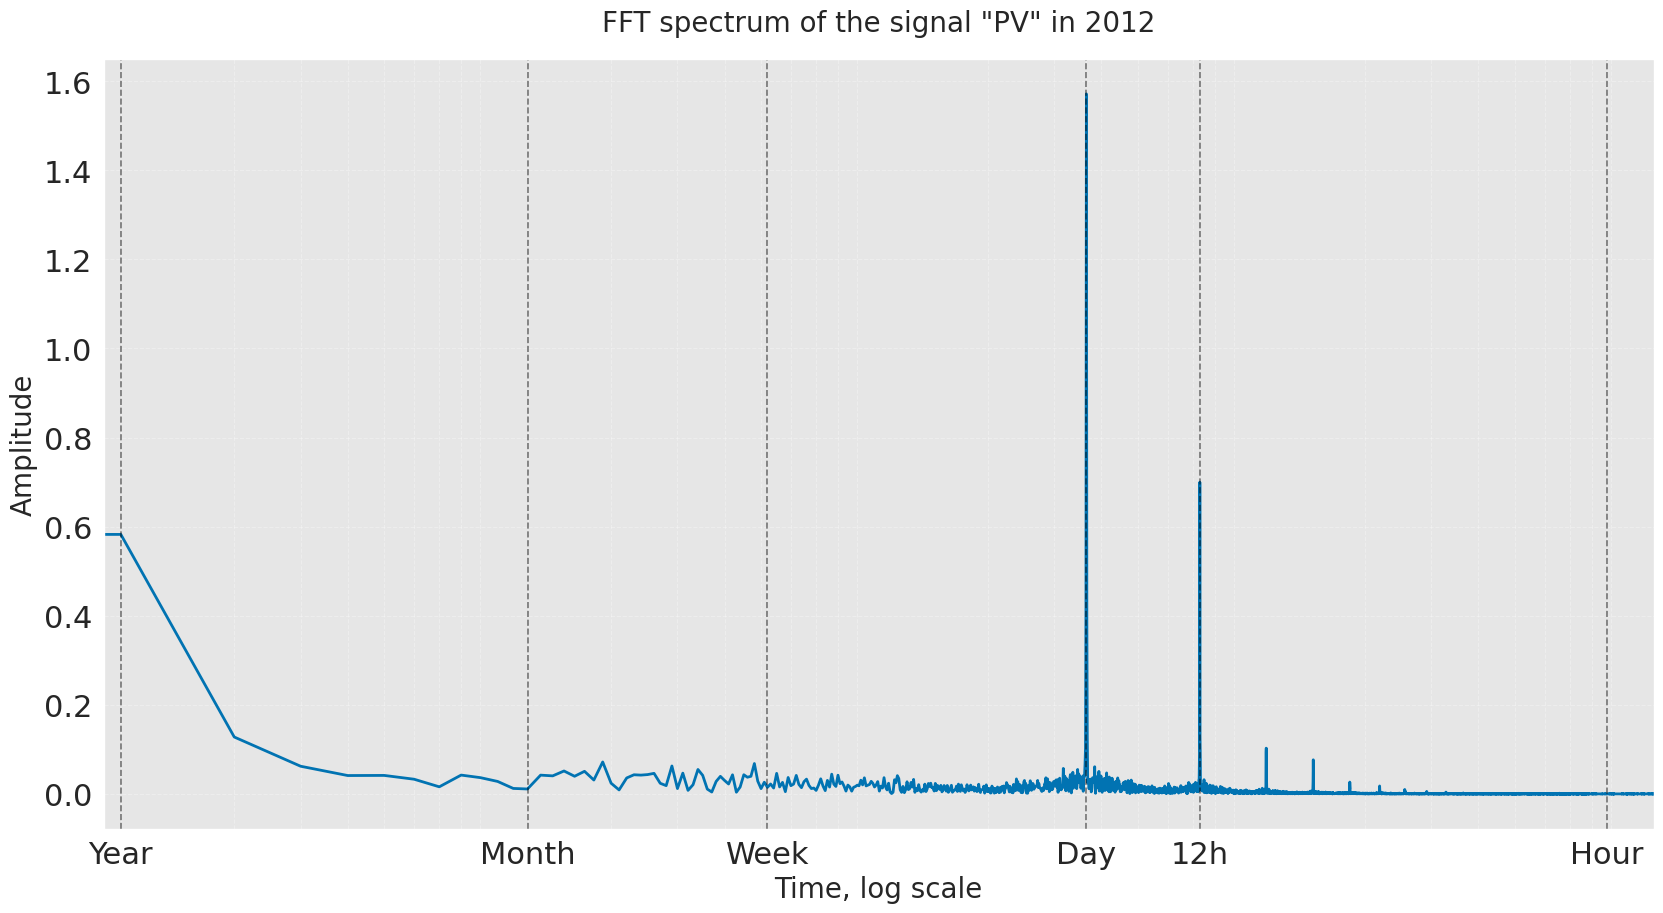

In [23]:
# FFT plot
fft(
    ndpd=64,
    dpy=365,
    signal_type='PV',  # ← Changed from 'signal'
    year='2012',
    input_data=TS_single_year
)

In [ ]:
# Import the FileManager class
from file_manager import WaveletFileManager

# Control parameters
country_name = 'France'
signal_type = 'PV'
year = year_to_process  # '2012' from cell 16

# Load matrix using FileManager
file_mgr = WaveletFileManager(region=country_name)  
matrix_file = file_mgr.get_matrix_path(year)

print(f"Loading matrix from: {matrix_file}")
matrix_sparse = sparse.load_npz(matrix_file)
print(f"Matrix loaded: {matrix_sparse.shape}, type: {type(matrix_sparse)}")

# Define which time scales to reconstruct
reconstructed_time_scales = [168., 4380., 8760.]  # Week, half-year, year

print(f"\nPreparing to reconstruct signal with {len(reconstructed_time_scales)} time scales...")
print(f"Beta sheet has {len(results_betas[year])} time scales")

# Reconstruct the signal - FIRST TEST WITHOUT PLOTTING
print("\nReconstructing (plot disabled for testing)...")
reconstructed_signal = reconstruct(
    time_scales=time_scales,
    reconstructed_time_scales=reconstructed_time_scales,
    matrix=matrix_sparse,  # Keep as sparse matrix
    beta_sheet=results_betas[year],
    title=f'{signal_type} Signal Reconstruction with Multiple Time Scales',
    xmin=0, 
    xmax=365,
    dpy=365, 
    dpd=64,
    add_offset=False, 
    plot=False  # DISABLE PLOT FIRST TO TEST
)

print(f"✅ Signal reconstructed! Shape: {reconstructed_signal.shape}")
print(f"Signal range: [{reconstructed_signal.min():.3f}, {reconstructed_signal.max():.3f}]")

In [ ]:
# DEBUG: Check data structures before calling reconstruct
print("=" * 60)
print("DEBUG: Checking data structures")
print("=" * 60)

print(f"\n1. time_scales length: {len(time_scales)}")
print(f"   time_scales: {time_scales}")

print(f"\n2. results_betas type: {type(results_betas)}")
print(f"   results_betas keys: {results_betas.keys()}")

print(f"\n3. results_betas['2012'] type: {type(results_betas['2012'])}")
print(f"   results_betas['2012'] length: {len(results_betas['2012'])}")

# Check structure of beta_sheet
beta_sheet = results_betas['2012']
print(f"\n4. Checking each time scale in beta_sheet:")
for i in range(min(3, len(beta_sheet))):  # Just check first 3
    print(f"   beta_sheet[{i}] type: {type(beta_sheet[i])}, length: {len(beta_sheet[i]) if hasattr(beta_sheet[i], '__len__') else 'N/A'}")

print(f"\n5. Matrix shape: {matrix.shape}")
print(f"   Matrix type: {type(matrix)}")

print("\n" + "=" * 60)

# Computing Energy, Power, and Nb of Cycles
<br/>

### From the coefficients betas of the wavelet decomposition, we can determine the flexibility required by the energy system

<br/>

***Satisfaction rate:*** Percentage of the time the consumption is satisfied. Examples:
* If satisfaction rate = 90%: At the day scales 0.9*365=328 days per year, the energy demand will be satisfied. We get rid of the 365-328=37 days with the highest electricity consumption
* Here the signal last 7 years. With a 90% satisfaction rate we get rid of the 37*7 extreme days over the last 7 years

## Now ploting the heat maps to display the signal vaiability

# Starting the wavelet decomposition

<br />

Signal is decomposed over a set of wavelets of 15 time scales :  [0.75, 1.5, 3., 6., 12, 24., 42., 84., 168., 273.75, 547.5, 1095., 2190., 4380.,
              8760.] hours
              
The time scale could be understood as the duration of charge-discharge of a storage device

<br />

<ins>This set of wavelets is built such that:</ins>



- There is 3 mother wavelets with different durations : _Year_ , _Week_ and _Day_
<br />

- Those 3 wavelets have a physical meaning and account for human and season cycles. Therefore, we want to make sure that the year time scale is properly center over the year (summer un summer and winter in winter), that dayly wavelets are starting from 12pm to 12 pm and not 5am to 5am,...
<br />

- For this  reason we should compute and use translations, as shown in the cell below
<br />

- The mother wavelets are then divided in daugther wavelets

<br />

_The 3 mother wavelets have to be adjusted on the signal: the _year_ should fit on the seasonal fluctuation, the _week_ on the week and weekend cycle, the _day_ on the nigh / day cycle
    * Translations are computed with the "Consumption signal" for each year
    * The same translations are reused for for the other time series

In [ ]:
# An example for an extreme case : 100% of electricity is produced by PV
scenario_name = 'PV'

conso = stacked_betas_square['Consumption'] # we extr   ct the consumption betas
prod =  stacked_betas_square['PV'] # we extract the production betas

pmc = [np.array(prod[i]) - np.array(conso[i]) for i in range(len(time_scales)) ] # pmc stand for production minus consumption

satisfactions = [80,95,99,100] # Satisfaction rate
# Percentage of the time the load will be met by the storage device.

satisfaction_labels = [str(satis)+'%' for satis in satisfactions]
# -------------------------------
# ------- Compute and plot E,P and N
#
results = calc_epn(pmc, satisfactions, time_scales, dpy, load_factor, shape = 'square')
plot_EPN(results['emax'], results['pmax'], results['n'], results['uf'], results['serv'],
         time_scales, satisfactions, scenario_name )

In [ ]:
# ----------------------------------
# ------ Translations ------------
# ----------------------------------
'''
First, optimal translations for the year, week and day mother wavelets
- if do_calc is false, translations are imported.
'''
# trans_file = 'trans_square_12_18'

trans_square = load_trans(path_trans, trans_file,
                   stacked_input_data, 'Consumption',
                   ndpd, dpy, 
                   'square', #shape of the wavelet: either 'square' or 'sine'
                    do_calc = True) # False: import translations. True: compute new translations

In [ ]:
test_function= [2]*365*8+ [0]*365*8 + [1]*365*(64-16)
len(test_function)== 365*64
plt.plot(test_function)

In [ ]:
# stacked_input_data = {'test': test_function}
# time_series = ['test']
# signal = 'test'
# years=['2012']
# year = '2012'

In [ ]:
# ----------------------------------------------------
# ------ Performing wavelet decomposition ------------
# ----------------------------------------------------
'''
Second, we compute the coefficients of the wavelet decomposition
- wl_shape : either 'sine' or 'square' shape
- To compute new matrix use imp_matrix = False. It can take quite some time !
'''
path_matrix = "saved_matrix\\square_shape\\"
stacked_betas_square, saved_sheets_square = compute_betas(time_series, stacked_input_data,
                 vy, vw, vd, dpy, ndpd, years,
                 trans_square,
                 path_matrix,
                 beta_path, wl_shape ='square', imp_matrix = True)

pkl.dump([stacked_betas_square, saved_sheets_square], open('betas_saved_square' + '.p', "wb"))

# [stacked_betas_square, saved_sheets_square] = pkl.load(open('betas_saved_square' + '.p', "rb"))

In [ ]:
# df = preplotprocessing(vy, vw , vd, ndpd, dpy, signal, #Then the kind of signal. In this tutorial its either 'Consommation', 'Eolien' or 'Solaire
#                       year, years,
#                       saved_sheets_square, # Here is the datasheet you want to plot. This datasheet is returned by the function compute_betas(). Here is ploted the square decomposition
#                       do_trans = None) # Eventualy retranslate the decomposition to make it feet to the week, day and sesonal cycles
# plot_betas_heatmap(df, signal, year , ndpd,
#                       cmin= -0.1,
#                       cmax= 0.1,
#                     ccenter = None)

In [ ]:
#
# The wavelet decomposition is saved in a disctionnary with the following sstructure:
print(saved_sheets_square.keys())
print(saved_sheets_square['Consumption'].keys())
print(saved_sheets_square['Consumption']["2012"][14]) # 14th time scale

# Plots


## Heatmaps

<br />

The wavelet decomposition can be depicted with a heatmaps.

<br />

Example in the cells below

# Wavelet _Versus_ Fourier transform

In [ ]:
year='2018' # year of the decomposition
index = years.index(year)

signal = 'Consumption'

input_data = stacked_input_data[signal][signal_length*index:signal_length*(index+1)]
fft(ndpd, dpy, signal, year, input_data)

# Reconstructing and filtering signals

In [ ]:
#
# Importing Matrix for the reconstruction
year = '2013'

path_matrix = "saved_matrix\\square_shape\\"
# path_matrix = "saved_matrix\\sine_shape\\"
matrix_name = 'A_'+ year+'.npz'

A_sparse  = sparse.load_npz(path_matrix + matrix_name)
A = sparse.csr_matrix.todense(A_sparse)
matrix = np.asarray(A)
# #
reconstruct(time_scales, [12, 24],
                matrix,saved_sheets_square['PV'][year], "2013 PV signal filtered with 12h and 24h square wavelets",
                xmin=150, xmax=154,
                dpy=365, dpd=64,
                add_offset=True)

reconstruct(time_scales, [24],
                matrix,saved_sheets_square['PV'][year], "2013 PV signal filtered with 24h square wavelets",
                xmin=150, xmax=154,
                dpy=365, dpd=64,
                add_offset=True)

reconstruct(time_scales, time_scales,
                matrix,saved_sheets_square['PV'][year], "Reconstructed PV signal",
                xmin=0, xmax=365,
                dpy=365, dpd=64,
                add_offset=True)

# To translate or not translate ?
<br/>
<center> <bold> Results comparison with translations and without translations </bold></center>

In [ ]:
# -----------------------------------------------
# ------ Create translations full of zeros -----
# -----------------------------------------------
zero_trans = []
Nyears = int(len(stacked_input_data['Consumption'])/(ndpd*dpy) )
for i in range(Nyears):
    zero_trans.append([0,0,0])
    
# ----------------------------------------------------
# ------ Decomposition with without translations -----
# ----------------------------------------------------

path_matrix = "saved_matrix\\square_shape\\no_trans\\"
beta_path = "betas\\square_shape_no_trans\\"

stacked_betas_square_no_trans, saved_sheets_square_no_trans = compute_betas(time_series, stacked_input_data,
                 vy, vw, vd, dpy, ndpd, years,
                 zero_trans,
                 path_matrix,
                 beta_path, wl_shape ='square', imp_matrix = True)

pkl.dump([stacked_betas_square_no_trans, saved_sheets_square_no_trans], open('betas_saved_square_no_trans' + '.p', "wb"))

# [stacked_betas_square_no_trans, saved_sheets_square_no_trans] = pkl.load(open('betas_saved_square_no_trans' + '.p', "rb"))

In [ ]:
# --------------------------------------
# -- Same plots without translations ---
# --------------------------------------
scenario_name = 'PV, square wavelet decomposition without translation'
conso = stacked_betas_square_no_trans['Consumption']
prod =  stacked_betas_square_no_trans['PV']

pmc = [np.array(prod[i]) - np.array(conso[i]) for i in range(len(time_scales)) ]

satisfactions = [80,95,99,100]
satisfaction_labels = [str(satis)+'%' for satis in satisfactions]
# -------------------------------
# ------- Compute and plot E,P and N
#
results_square_PV_no_trans = calc_epn(pmc, satisfactions, time_scales, dpy, load_factor, shape = 'square')
plot_EPN(results_square_PV_no_trans['emax'], results_square_PV_no_trans['pmax'], results_square_PV_no_trans['n'], results_square_PV_no_trans['uf'], results_square_PV_no_trans['serv'],
         time_scales, satisfactions, scenario_name )

# Sine and square shape wavelets
<br/>
Wavelets can take various shapes. We used here both sine and square shape. Here is and example of a sine shape decomposition

In [ ]:
# -------- Import translations -----
# trans_file = 'trans_sine_12_18'

trans_sine = load_trans(path_trans, trans_file,
                   stacked_input_data, 'Consommation',
                   ndpd, dpy, 
                   'sine', do_calc=False)
# ------Perform wavelet decomposition ----

beta_path = "betas\\sine_shape\\"

path_matrix = "saved_matrix\\sine_shape\\"

stacked_betas_sine, saved_sheets_sine = compute_betas(time_series, stacked_input_data,
                 vy,vw,vd,dpy, ndpd, years,
                 trans_sine,
                 path_matrix,
                 beta_path, wl_shape ='sine', imp_matrix = True)

# ----- Plot 100% PV scenario ---

scenario_name = 'PV, sine wavelet decomposition'
sine_conso = stacked_betas_sine['Consumption']
sine_prod =  stacked_betas_sine['PV']

sine_pmc = [np.array(sine_prod[i]) - np.array(sine_conso[i]) for i in range(len(time_scales)) ]

satisfactions = [80,95,99,100]
satisfaction_labels = [str(satis)+'%' for satis in satisfactions]
# -------------------------------
# ------- Compute and plot E,P and N
#
results_sine = calc_epn(sine_pmc, satisfactions, time_scales, dpy, load_factor, shape = 'sine')

In [ ]:
plot_EPN(results_sine['emax'], results_sine['pmax'], results_sine['n'], results_sine['uf'], results_sine['serv'],
         time_scales, satisfactions, scenario_name )

In [ ]:
# -------- Reconstruct signal -----

year = '2013'
path_matrix = "saved_matrix\\sine_shape\\"
matrix_name = 'A_'+ year+'.npz'

A_sparse  = sparse.load_npz(path_matrix + matrix_name)
A = sparse.csr_matrix.todense(A_sparse)
matrix = np.asarray(A)
# #
reconstruct(time_scales, [24],
                matrix,saved_sheets_sine['PV'][year], "Signal PV 2013 with 24 hours sine wavelets",
                xmin=0, xmax=15,
                dpy=365, dpd=64,
                add_offset=True)

reconstruct(time_scales, time_scales,
                matrix,saved_sheets_sine['PV'][year], "2013 PV signal reconsruction",
                xmin=0, xmax=365,
                dpy=365, dpd=64,
                add_offset=True)